<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_05_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.05. 기초모델 구현 - Adaline
---
* 날짜:
* 이름:

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Adaline 프로세스를 이해한다. 
    - Adaline 알고리즘을 구현한다.
    - 경사하강법에 대해 이해한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/content/drive/MyDrive/DeepLearningFrameWork/02.SkillTreePython-DataAnalysis-main/05.머신러닝기반데이터분석/")
from data_loader import iris_loader

## 클래스 작성
---

In [64]:
class AdalineGD():
  def __init__(self, lr=0.01, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
      size = X.shape[1]
      self.w = self.seed.normal(0, 0.01, size = size + 1)

  def model(self, X):
      return np.dot(X, self.w[ :-1]) + self.w[-1]

  def predict(self, X):
      y_hat = self.model(X)
      logit = np.where(y_hat >= 0.5, 1, 0)
      return logit

  def loss(self, y, y_hat):
      return 1/2 * ( (y-y_hat)**2 )
    #  return 1/2 * np.sum( (y-y_hat)**2 )
  def accuracy(self, y, y_logit):
      return np.count_nonzero(y == y_logit)/len(y)

  def evaluate(self, X, y):
      y_hat = self.model(X) # 예측
      y_logit = self.predict(X)
      loss = ( self.loss(y,y_hat).sum() ) / len(y) # 손실 평균
      acc = self.accuracy(y, y_logit) # 정확도 
      return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):
      # 최적화
      for xi, yi in zip(X,y):
          y_hat = self.model(xi)
          self.w[:-1] += self.lr*np.sum((yi - y_hat) * xi)
          self.w[-1] += self.lr *np.sum((yi - y_hat))
      
      # 다른 코드
    
      # 최적화 1
    #   y_hat = self.model(X) 
    #   for j, xj in enumerate(X.T): # feature 별 가중치 업데이트
    #     self.w[j]+= self.lr * np.sum( (y-y_hat)*xj )  # weights 업데이트    
    #   self.w[-1] += self.lr * np.sum(y-y_hat) #  bias 업데이트   
      
    #   # 최적화 2      
    #   y_hat = self.model(X)
    #   self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
    #   self.w[-1] += self.lr * np.sum(y-y_hat)
    
      
      # 평가 및 결과 저장
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    y_pred = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [58]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

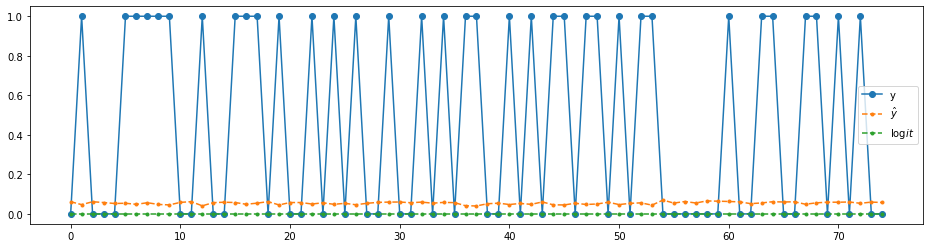

성능:  (0.21108347124931862, 0.5333333333333333)


In [65]:
model = AdalineGD(lr = 0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [66]:
history = model.fit(X_train, y_train, epochs=10, show_params=True) # 학습 파라미터(웨이트 값들 출력)

[Epoch 0] loss: 0.11  acc: 0.53
[ 0.01188736  0.05235086  0.02729067  0.03809313 -0.00023624]
[Epoch 1] loss: 0.09  acc: 0.93
[0.02300232 0.06346582 0.03840563 0.04920809 0.00012436]
[Epoch 2] loss: 0.09  acc: 0.95
[ 0.02656138  0.06702489  0.0419647   0.05276716 -0.00011746]
[Epoch 3] loss: 0.09  acc: 0.92
[ 0.0277204   0.06818391  0.04312372  0.05392618 -0.00055053]
[Epoch 4] loss: 0.09  acc: 0.93
[ 0.02811708  0.06858058  0.04352039  0.05432285 -0.00104425]
[Epoch 5] loss: 0.09  acc: 0.93
[ 0.02827159  0.06873509  0.04367491  0.05447737 -0.00155713]
[Epoch 6] loss: 0.09  acc: 0.93
[ 0.02834917  0.06881268  0.04375249  0.05455495 -0.002076  ]
[Epoch 7] loss: 0.09  acc: 0.93
[ 0.02840232  0.06886582  0.04380563  0.05460809 -0.00259666]
[Epoch 8] loss: 0.09  acc: 0.93
[ 0.02844769  0.06891119  0.043851    0.05465346 -0.0031178 ]
[Epoch 9] loss: 0.09  acc: 0.93
[ 0.02849058  0.06895408  0.0438939   0.05469636 -0.00363899]


### **학습 후 성능평가**

성능:  (0.08843029559047727, 0.9333333333333333)


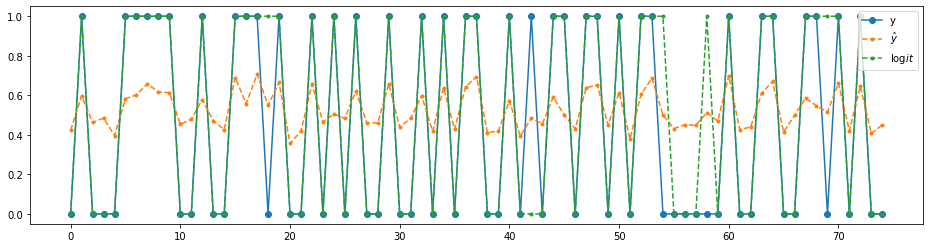

In [67]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.09212962838416315, 0.88)


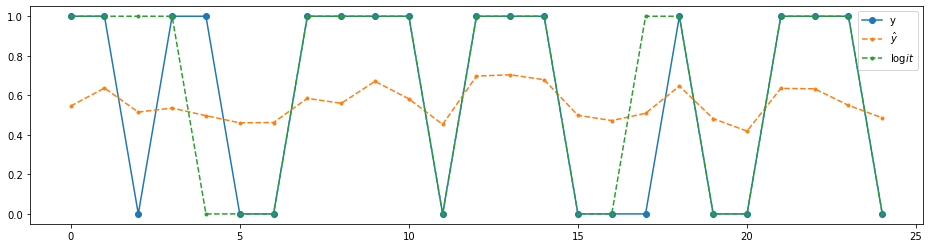

In [68]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

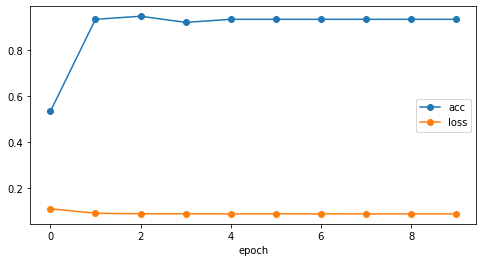

In [69]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [70]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = AdalineGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.19  acc: 0.53
[Epoch 1] loss: 0.17  acc: 0.53
[Epoch 2] loss: 0.15  acc: 0.53
[Epoch 3] loss: 0.14  acc: 0.53
[Epoch 4] loss: 0.13  acc: 0.53
[Epoch 5] loss: 0.12  acc: 0.53
[Epoch 6] loss: 0.11  acc: 0.53
[Epoch 7] loss: 0.11  acc: 0.53
[Epoch 8] loss: 0.11  acc: 0.53
[Epoch 9] loss: 0.1  acc: 0.55
===== lr 1e-05 ==== (0.11967239102892484, 0.44)
[Epoch 0] loss: 0.1  acc: 0.53
[Epoch 1] loss: 0.09  acc: 0.96
[Epoch 2] loss: 0.09  acc: 0.93
[Epoch 3] loss: 0.09  acc: 0.92
[Epoch 4] loss: 0.09  acc: 0.92
[Epoch 5] loss: 0.09  acc: 0.93
[Epoch 6] loss: 0.09  acc: 0.93
[Epoch 7] loss: 0.09  acc: 0.93
[Epoch 8] loss: 0.09  acc: 0.93
[Epoch 9] loss: 0.09  acc: 0.93
===== lr 0.0001 ==== (0.09201867808929327, 0.96)
[Epoch 0] loss: 0.09  acc: 0.96
[Epoch 1] loss: 0.09  acc: 0.96
[Epoch 2] loss: 0.09  acc: 0.96
[Epoch 3] loss: 0.09  acc: 0.96
[Epoch 4] loss: 0.09  acc: 0.96
[Epoch 5] loss: 0.09  acc: 0.96
[Epoch 6] loss: 0.09  acc: 0.96
[Epoch 7] loss: 0.09  acc: 0.96
[Epoch 8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in add
